## Module 4: 

## Team Members:
Neil Shroff and Kayla Chin

## Project Title: Investigating the Spread of Measles in Nigeria Utilizing a SIR Model


## Project Goal:
This project seeks to model the cases of Measles in Nigeria from 2020-2021 and predict new cases of the disease utilizing the SIR Model 

## Disease Background:
* Prevalence & Incidence
    * Development/outbreaks of the disease are typically irregular, with peaks in the drier months (February-April)
    * African countries have a measle death rate 10-20 times those in industrialized countries
    * 64.9 out of 1 million children get infected with measles in Nigeria 
        * 184 outbreaks with 11433 confirmed cases within a given year 
* Economic Burden
    * Incidence rates are significantly higher than what it should be according to WHO standards (1 case/ million population)
    * The cost of raising the vaccination rate is still considered unattainable in many African countries 
        * Plans have been made to implement joint campaigns, which would decrease costs by about 420,000 USD 
    * The primary hinderence is lack of workforce 
        * The number of workers (both healthcare and admin organizers) is incredibely high to accomadate for the mass amounts of children that would require vaccines 
* Risk factors (genetic, lifestyle) & Societal determinants
    * The primary risk factor is being unvaccinated 
        * High incidence rates are largely related to low vaccination availability
    * Weakened immune system and malnutrition also increase the liklihood of contracting measles 
    * Proximity to those who have measles 
        * Measles is a viral disease and spreads through droplets in the air 

* Symptoms
    * Measles causes flu-like symptoms including a high fever, barky cough, bloodshot eyes, lethargy, Koplik's spots, rashes, diarrhea, stomach pain, vomiting, sore throat, headache, and muscle pain
    * Symptoms do not appear all at once, a fever, cough, and running nose present first, then Koplik's spots, and then a rash 
* Diagnosis
    * Measles is diagnosed by doing a blood test, a swab test, or a urine test.
    *  In these tests, proteins produced by the body/genetic material from the measles virus is detected to determine if the individual has contracted the disease. 

* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology)
    * Measles virus is an envolped virus with single stranded, non segmented negative sense RNA genome.
    * Initially, measles is transmitted from person to person as an airborne infection. The primary site of the infection is in the lungs, targeting alveolar macrophages/dendritic cells. The measles virus will replicate in the lungs and then spread to the regional lympoid tissues which will then spread to the rest of the body and create a systemic response to infection, resulting in the symptoms mentioned above. 

## Work Cited 
* Science Direct - Combating recurrent measles outbreaks in Nigeria: Short-term and long-term strategies
* NIH - Burden of measles in Nigeria
* NIH - Geographical and time trends of measles incidence and measles vaccination coverage and their correlation in Nigeria
* NIH - The cost of implementing measles campaign in Nigeria
* Mayo Clinic - Measles 
* National Library of Medicine - Measles Virus Host Invasion and Pathogenesis
* Cleveland Clinic - Measles (Rubeola)


## Dataset: 

The data set that this group will be analyzing will be the number of cases of measles in Nigeria from 2020-2021. This data is found in Canvas in Module 4 underneath the data section. The data was collected from the Nigeria Center Disease Control situation report and the national disease outbreak dashboard using webplotdigitizer (linked below).

https://www.kaggle.com/datasets/adegboyegaadebayo/nigeria-measles-outbreak-dataset2007-2021


In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import solve_ivp
from main_functions import convert_cumulative_to_SIR
from main_functions import euler_sir


In [3]:
#First read the CSV file and print the first 5 rows of data
df = pd.read_csv('Measles.csv')
print(df.head())


         date  confirmed_cases
0  2020-08-03             25.0
1  2020-08-10             29.0
2  2020-08-17             27.0
3  2020-08-24             20.0
4  2020-08-31             17.0


In [4]:
#Rename the column so that it matches the convert_cumulative_to_SIR function
df['date'] = pd.to_datetime(df['date'])
df['cumulative_cases'] = df['confirmed_cases'].cumsum()
#Define the population size, Nigeria's population from 2020-2021 was found here https://www.worldometers.info/world-population/nigeria-population/
population_size = 216250000
SIR_df = convert_cumulative_to_SIR(df, date_col = 'date', cumulative_col = 'cumulative_cases', population = population_size, infectious_period = 2, I_col = 'I_est', R_col = 'R_est', S_col = 'S_est')
print(SIR_df.head(15))

         date  confirmed_cases  cumulative_cases  new_cases  I_est  R_est  \
0  2020-08-03             25.0              25.0       25.0   25.0    0.0   
1  2020-08-10             29.0              54.0       29.0   54.0    0.0   
2  2020-08-17             27.0              81.0       27.0   56.0   25.0   
3  2020-08-24             20.0             101.0       20.0   47.0   54.0   
4  2020-08-31             17.0             118.0       17.0   37.0   81.0   
5  2020-09-07             33.0             151.0       33.0   50.0  101.0   
6  2020-09-14             44.0             195.0       44.0   77.0  118.0   
7  2020-09-21             34.0             229.0       34.0   78.0  151.0   
8  2020-09-28             32.0             261.0       32.0   66.0  195.0   
9  2020-10-05             28.0             289.0       28.0   60.0  229.0   
10 2020-10-12             24.0             313.0       24.0   52.0  261.0   
11 2020-10-19             28.0             341.0       28.0   52.0  289.0   

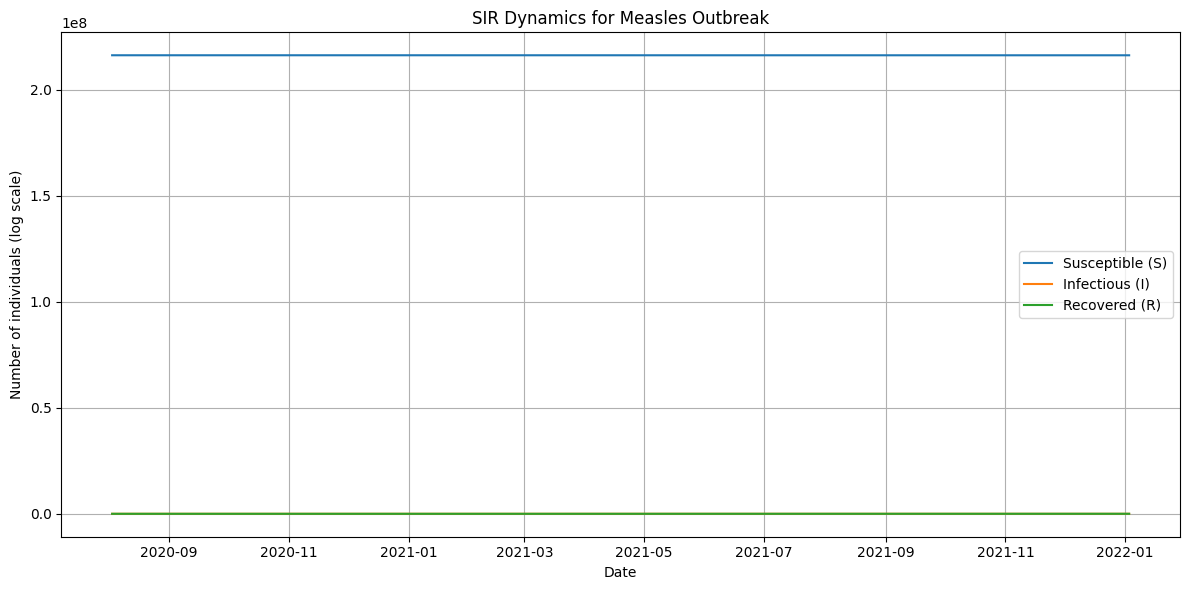

In [5]:
#Plotting S, I, and R over time
plt.figure(figsize=(12,6))
plt.plot(SIR_df["date"], SIR_df["S_est"], label="Susceptible (S)")
plt.plot(SIR_df["date"], SIR_df["I_est"], label="Infectious (I)")
plt.plot(SIR_df["date"], SIR_df["R_est"], label="Recovered (R)")
plt.xlabel("Date")
plt.ylabel("Number of individuals (log scale)")
plt.title("SIR Dynamics for Measles Outbreak")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

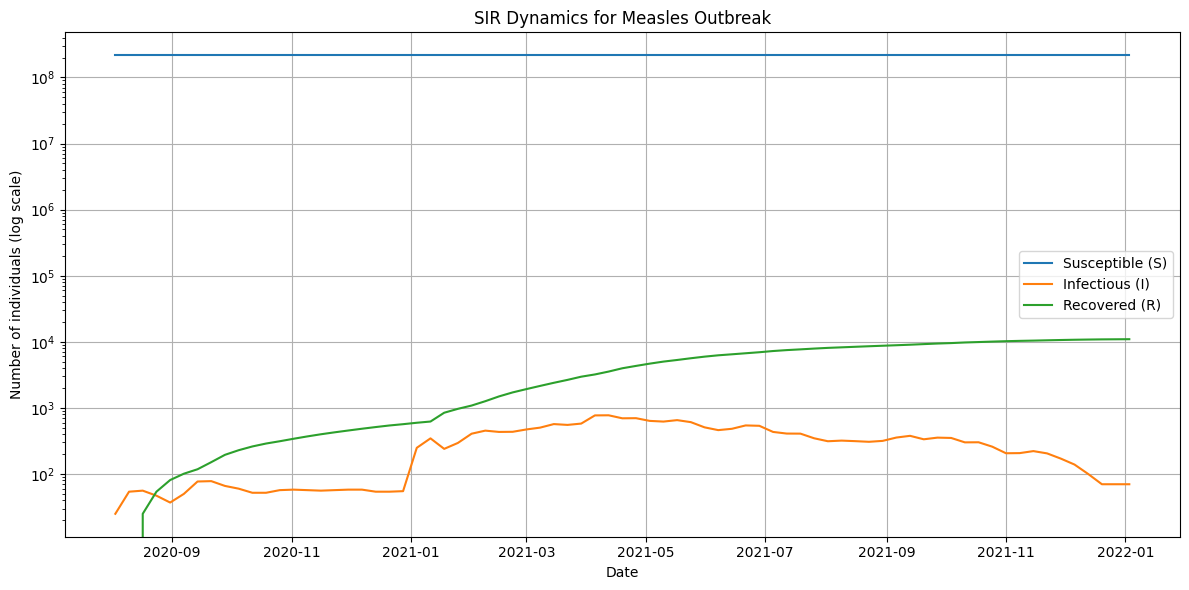

In [6]:
#Plotting S, I, and R over time on a log scale
plt.figure(figsize=(12,6))
plt.plot(SIR_df["date"], SIR_df["S_est"], label="Susceptible (S)")
plt.plot(SIR_df["date"], SIR_df["I_est"], label="Infectious (I)")
plt.plot(SIR_df["date"], SIR_df["R_est"], label="Recovered (R)")
plt.yscale("log")
plt.xlabel("Date")
plt.ylabel("Number of individuals (log scale)")
plt.title("SIR Dynamics for Measles Outbreak")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

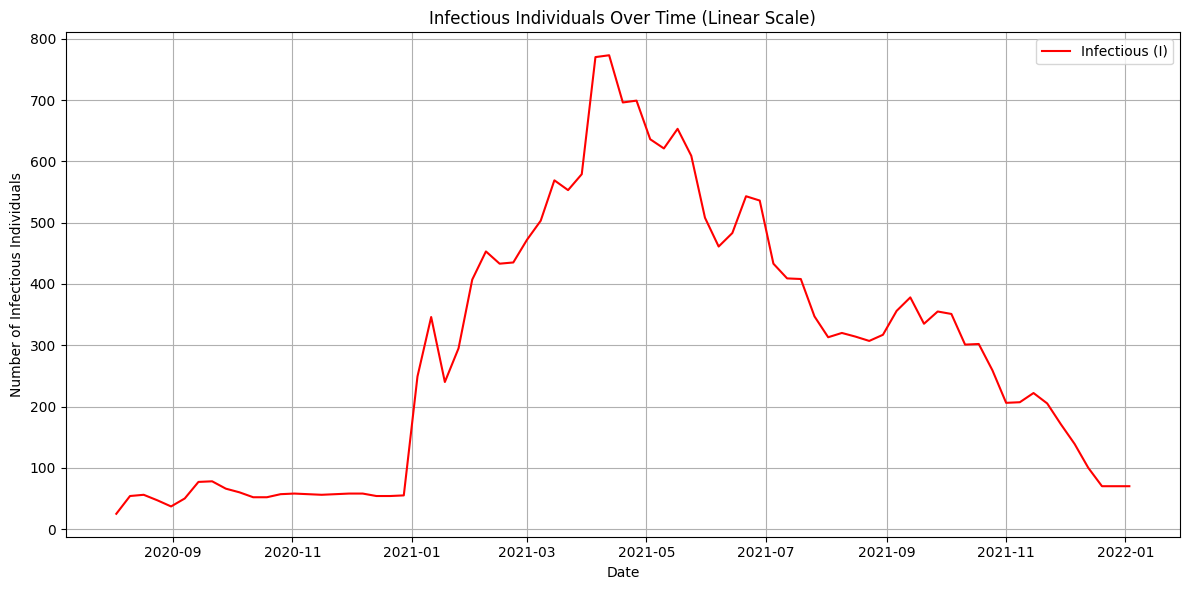

In [7]:
#Plotting Infectious Inviduals over time (Linear Scale)
plt.figure(figsize=(12,6))
plt.plot(SIR_df["date"], SIR_df["I_est"], label="Infectious (I)", color="red")
plt.xlabel("Date")
plt.ylabel("Number of Infectious Individuals")
plt.title("Infectious Individuals Over Time (Linear Scale)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

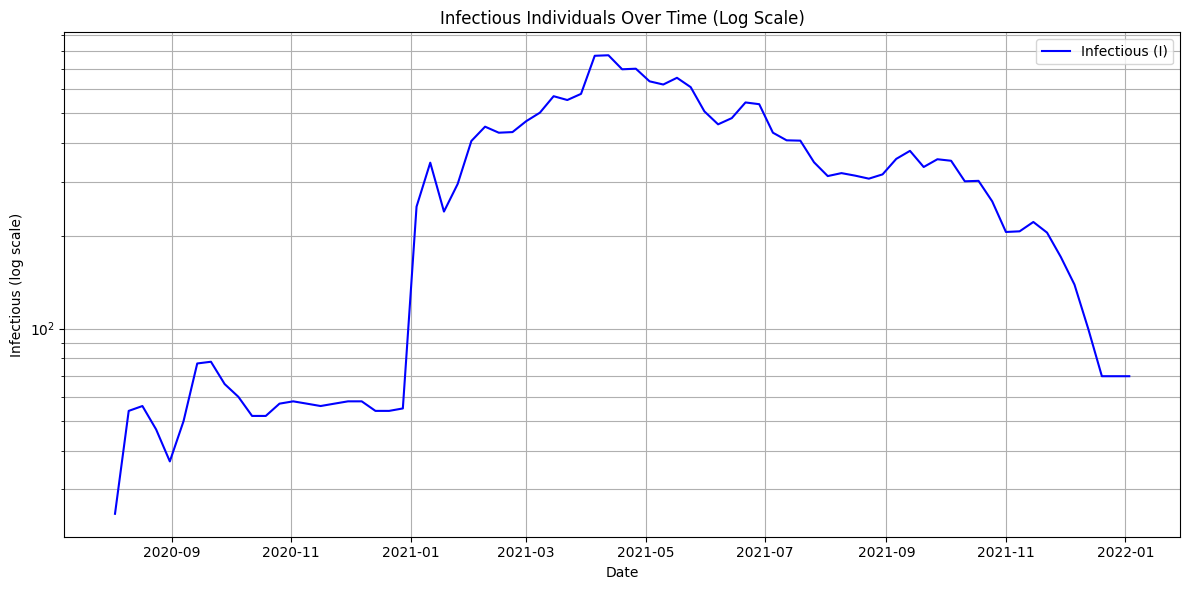

In [8]:
#Plotting Infectious Individuals over time (Log Scale)
plt.figure(figsize=(12,6))
plt.plot(SIR_df["date"], SIR_df["I_est"], label="Infectious (I)", color="blue")
plt.yscale("log")
plt.xlabel("Date")
plt.ylabel("Infectious (log scale)")
plt.title("Infectious Individuals Over Time (Log Scale)")
plt.legend()
plt.grid(True, which="both")
plt.tight_layout()
plt.show()

## Data Analyis: 

### Methods

To analyze the model, Euler's method was utilized to fit the SIR model over time. Then, future data was predicted using the model and the RK4 Method was finally implemented to reduce the numerical error for the prediction of future data. 


### Analysis
Initially, using Euler's method, the SIR model was fit so that it closely resembled the dataset. Then using the first half of the dataset as testing, the model was further fit, and future cases were predicted. Lastly, RK4 was used on the second half of the data to reduce anymore numerical error.

#### 1. Fitting the SIR Model

Initial beta guess: 0.3
Initial gamma guess: 0.1
Initial SSE: 5.2685250720513683e+17


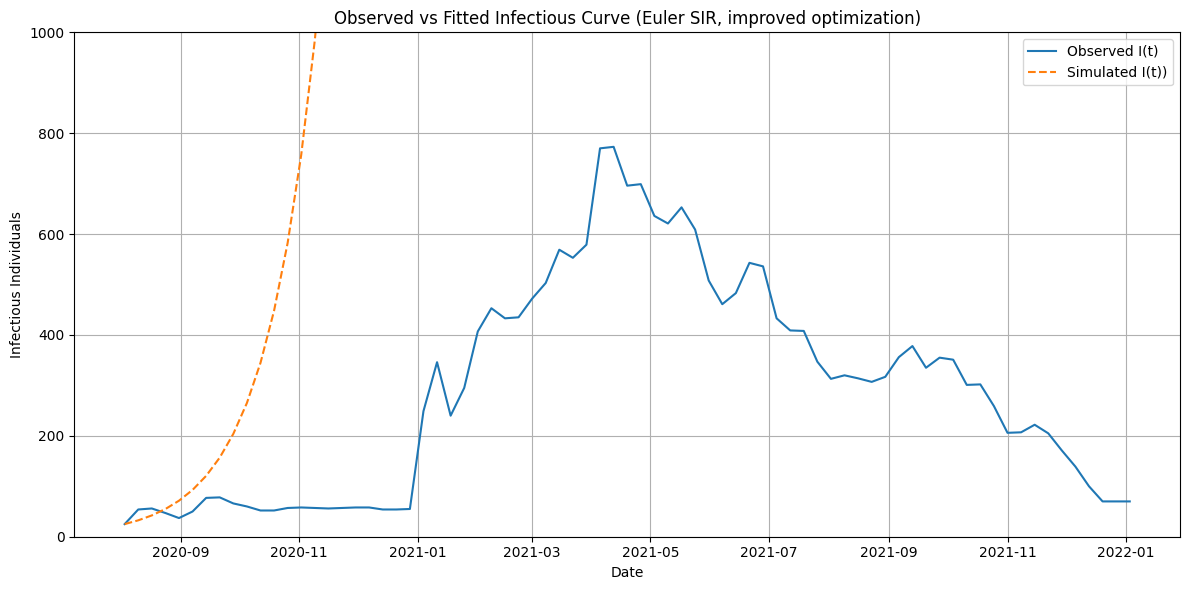

Optimized beta 0.03956520171404952
Optimized gamma 0.1
Minimum SSE: 5999395.203155644


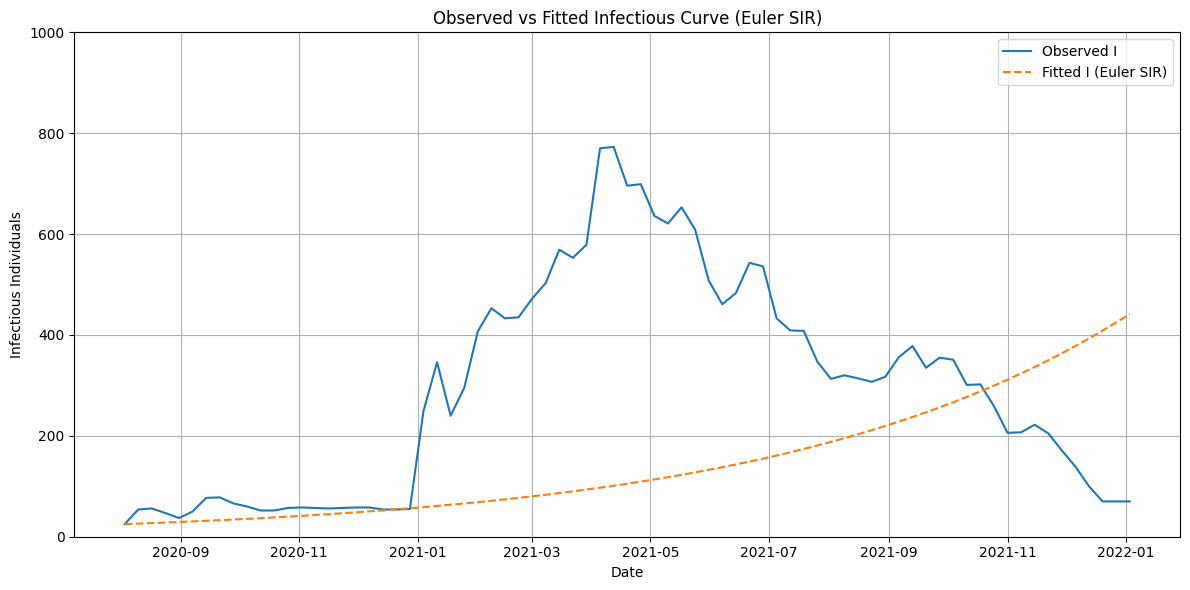

In [9]:
SIR_df = convert_cumulative_to_SIR(df, date_col = 'date', cumulative_col = 'cumulative_cases', population = population_size, infectious_period = 2)
t = np.arange(len(SIR_df))

# Initial conditions: assume small I0, large S0
S0 = float(SIR_df["S_est"].iloc[0])
I0 = float(SIR_df["I_est"].iloc[0])
R0 = float(SIR_df["R_est"].iloc[0])
I_obs = SIR_df["I_est"].values

#Simulate SIR using Euler's method with initial guess parameters
initial_beta = 0.3
initial_gamma = 0.1
S_sim, I_sim, R_sim = euler_sir(beta = initial_beta, gamma = initial_gamma, S0 = S0, I0 = I0, R0 = R0, t = t, N = population_size)

#Compute the SSE between observed and simulated infectious individuals
sse_initial = np.sum((I_obs - I_sim)**2)

# Plot the observed vs fitted infectious curve
print('Initial beta guess:', initial_beta)
print('Initial gamma guess:', initial_gamma)
print('Initial SSE:', sse_initial)
plt.figure(figsize=(12,6))
plt.plot(SIR_df["date"], I_obs, "-", label="Observed I(t)")
plt.plot(SIR_df["date"], I_sim, "--", label="Simulated I(t))")
plt.xlabel("Date")
plt.ylabel("Infectious Individuals")
plt.ylim([0, 1000])
plt.title("Observed vs Fitted Infectious Curve (Euler SIR, improved optimization)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Optimize beta and gamma to fit the observed data
def sse_SIR (params, t, S0, I0, R0, population_size, I_obs):
    beta, gamma = params

    if beta < 0 or gamma < 0:
        return np.inf  
    
    _, I_sim, _ = euler_sir(beta=beta, gamma=gamma, S0=S0, I0=I0, R0=R0, t=t, N = population_size)
    return np.sum((I_obs - I_sim)**2)
initial_params = [initial_beta, initial_gamma]
bounds = [(0, 1.0), (0, 1.0)]
result = minimize(sse_SIR, initial_params, args=(t,S0,I0,R0,population_size ,I_obs), method = 'L-BFGS-B', bounds = bounds)
beta_opt, gamma_opt = result.x
print("Optimized beta", beta_opt)
print('Optimized gamma', gamma_opt)
print('Minimum SSE:', result.fun)


#Simulate SIR with optimized parameters
S_opt, I_opt, R_opt = euler_sir(beta = beta_opt, gamma = gamma_opt, S0 = S0, I0 = I0, R0 = R0, t = t, N = population_size)

# Plot the observed vs optimized fitted infectious curve
plt.figure(figsize=(12,6))
plt.plot(df["date"], I_obs, "-", label="Observed I")
plt.plot(df["date"], I_opt, "--", label="Fitted I (Euler SIR)")
plt.xlabel("Date")
plt.ylabel("Infectious Individuals")
plt.ylim([0, 1000])
plt.title("Observed vs Fitted Infectious Curve (Euler SIR)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Predicting Future Infectious cases using the SIR model

Optimal beta (train half): 0.06984198943143512
Optimal gamma (train half): 0.1
Final SSE (train half): 9.00394821963137
SSE on second half: 8781.237936870144


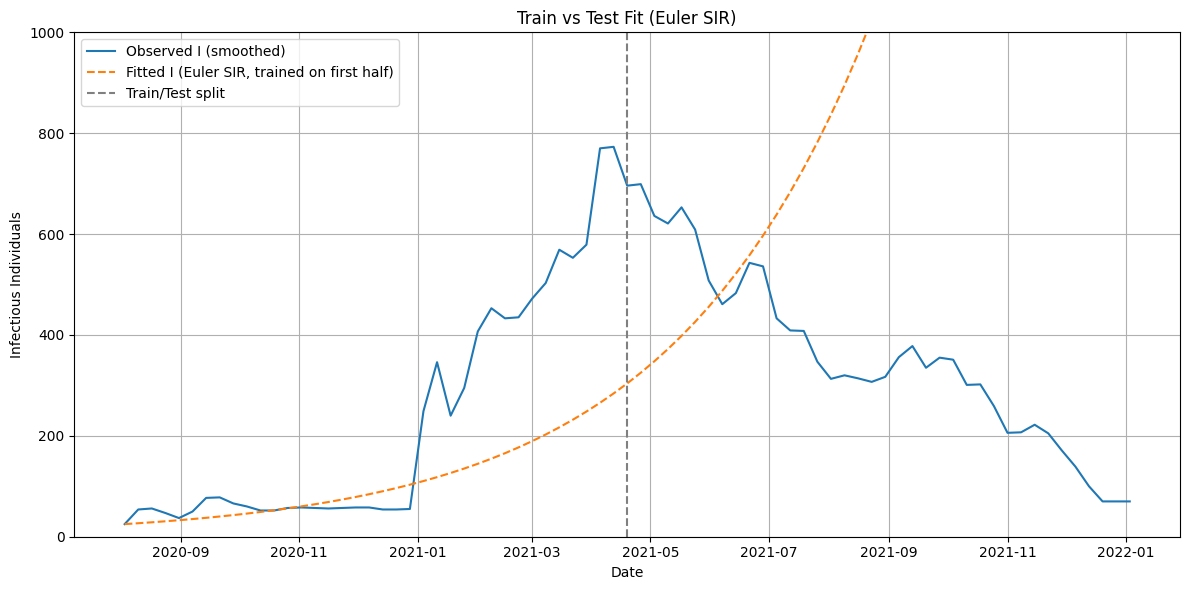

The optimal beta from the training half is different compared to the optimal beta from the full dataset.
Since the SSE on the second half of the data is larger than that on the training half, this indicates that the model fit is not as good on unseen data, suggesting potential overfitting or changes in disease dynamics over time.
The midpoint method might show a lower numerical error, as it takes half steps to estimate the slope at the midpoint, and then uses the slope at the midpoint for the entire model. Thus, larger step sizes can be taken without losing accuracy. Due to this, the Midpoint Method better captures the nonlinear dynamics of the SIR model compared to Euler's method, which can lead to improved parameter estimation and a better fit to the observed data.


In [10]:
#Split the dataset into halves
midpoint = len(t) // 2
t_train = t[:midpoint]
t_test = t[midpoint:]
I_train = I_obs[:midpoint]
I_test = I_obs[midpoint:]
dates_train = SIR_df["date"].iloc[:midpoint]
dates_test = SIR_df["date"].iloc[midpoint:]

#Initial conditions for training set
S0 = float(SIR_df["S_est"].iloc[0])
I0 = float(SIR_df["I_est"].iloc[0])
R0 = float(SIR_df["R_est"].iloc[0])

#SSE function for training set
def sse_train(params):
    beta, gamma = params
    if beta <= 0 or gamma <= 0:
        return np.inf
    _, I_sim, _ = euler_sir(beta = beta, gamma= gamma, S0 =S0, I0=I0, R0=R0, t=t_train, N=population_size)
    return np.sum(((I_train - I_sim) / (I_train + 1))**2)

#Optimize the first half of the training set
initial_guess = [0.5, 0.1]
bounds = [(0.01, 2.0), (0.01, 1.0)]
result = minimize(sse_train, initial_guess, bounds=bounds, method="L-BFGS-B")
beta_opt, gamma_opt = result.x
print("Optimal beta (train half):", beta_opt)
print("Optimal gamma (train half):", gamma_opt)
print("Final SSE (train half):", result.fun)

#Simulate the full dataset using the optimized parameters from the training set
S_fit, I_fit, R_fit = euler_sir(beta = beta_opt, gamma = gamma_opt, S0 = S0, I0 = I0, R0 = R0, t = t, N= population_size)

#Do a SSE calculation on the second test set
I_pred_test = I_fit[midpoint:]
sse_test = np.sum(((I_test - I_pred_test) / (I_test + 1))**2)
print("SSE on second half:", sse_test)

#Plot the observed vs. fitted graphs
plt.figure(figsize=(12,6))
plt.plot(SIR_df["date"], I_obs, "-", label="Observed I (smoothed)")
plt.plot(SIR_df["date"], I_fit, "--", label="Fitted I (Euler SIR, trained on first half)")
plt.axvline(SIR_df["date"].iloc[midpoint], color="gray", linestyle="--", label="Train/Test split")
plt.xlabel("Date")
plt.ylabel("Infectious Individuals")
plt.ylim([0, 1000])
plt.title("Train vs Test Fit (Euler SIR)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print('The optimal beta from the training half is different compared to the optimal beta from the full dataset.')
print('Since the SSE on the second half of the data is larger than that on the training half, this indicates that the model fit is not as good on unseen data, suggesting potential overfitting or changes in disease dynamics over time.')
print("The midpoint method might show a lower numerical error, as it takes half steps to estimate the slope at the midpoint, and then uses the slope at the midpoint for the entire model. Thus, larger step sizes can be taken without losing accuracy. Due to this, the Midpoint Method better captures the nonlinear dynamics of the SIR model compared to Euler's method, which can lead to improved parameter estimation and a better fit to the observed data.")

#### 3. Decreasing Numerical Error with RK4 Method


#### 4. Extending the Analysis by incorporating births into the SIR model for Measles in Nigeria

=== Parameter Estimates (trained on first half) ===
Euler  : beta = 0.0698, gamma = 0.1000
RK45   : beta = 0.5324, gamma = 0.4649

=== Out-of-sample SSE (second half) ===
Euler SSE : 8781.237937
RK45 SSE  : 8765.418996
RK45 improvement over Euler: 0.18%



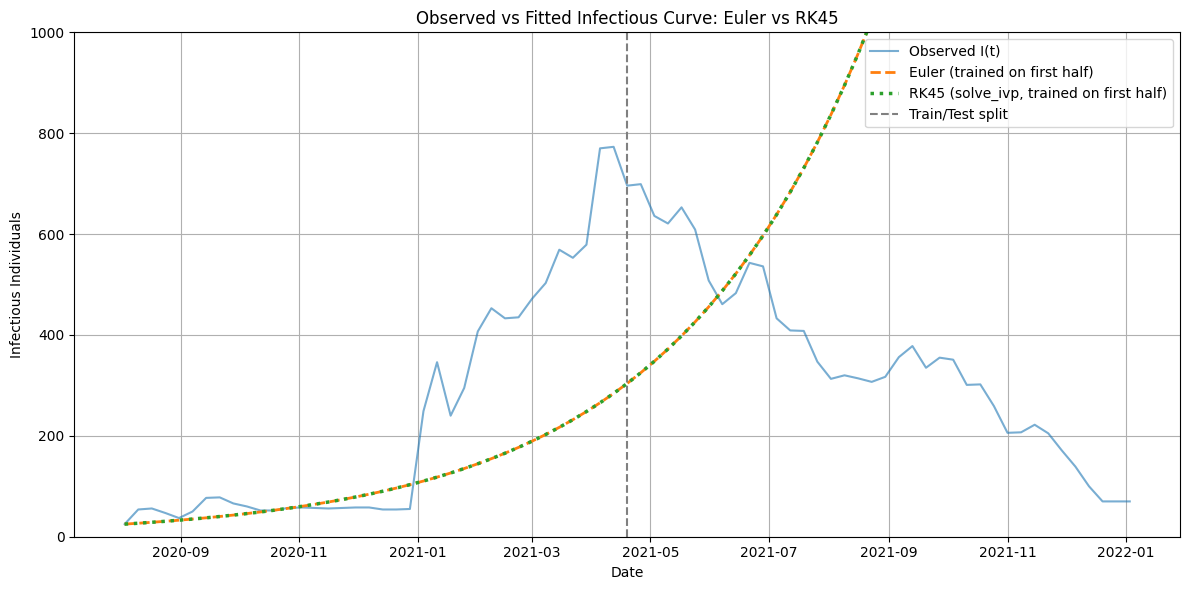

In [11]:
#Initial conditions for training set
y0= (S0, I0, R0)

# SSE on second half (Euler)
def weighted_sse(y_obs, y_sim):
    return np.sum(((y_obs - y_sim) / (y_obs + 1))**2)
I_euler_test = I_fit[midpoint:]
sse_euler_test = weighted_sse(I_test, I_euler_test)

#Solve_ivp (Runge–Kutta RK45) SIR
def sir_ode(t, y, beta, gamma, N):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

def simulate_ivp(beta, gamma, y0, N, t_eval):
    sol = solve_ivp(sir_ode, t_span=(t_eval[0], t_eval[-1]), y0=y0, t_eval=t_eval, args=(beta, gamma, N), method="RK45", rtol=1e-6, atol=1e-9)
    if not sol.success:
        raise RuntimeError(sol.message)
    return sol.y

def sse_train_ivp(params):
    beta, gamma = params
    if beta <= 0 or gamma <= 0:
        return np.inf
    _, I_sim, _ = simulate_ivp(beta=beta, gamma=gamma, y0=y0, N=population_size, t_eval = t_train)
    return weighted_sse(I_train, I_sim)

#Optimize RK (solve_ivp) on first half
initial_guess = [0.5, 0.1]
bounds = [(0.01, 2.0), (0.01, 1.0)]
res_ivp = minimize(sse_train_ivp, initial_guess, bounds=bounds, method="L-BFGS-B")
beta_ivp, gamma_ivp = res_ivp.x

# Simulate full with RK params
S_ivp_full, I_ivp_full, R_ivp_full = simulate_ivp(beta = beta_ivp, gamma = gamma_ivp, y0 = y0, N = population_size, t_eval = t)

# SSE on second half (RK)
I_ivp_test = I_ivp_full[midpoint:]
sse_ivp_test = weighted_sse(I_test, I_ivp_test)

# Show a comparison of Euler vs RK45 results
print("=== Parameter Estimates (trained on first half) ===")
print(f"Euler  : beta = {beta_opt:.4f}, gamma = {gamma_opt:.4f}")
print(f"RK45   : beta = {beta_ivp:.4f}, gamma = {gamma_ivp:.4f}")
print()

print("=== Out-of-sample SSE (second half) ===")
print(f"Euler SSE : {sse_euler_test:.6f}")
print(f"RK45 SSE  : {sse_ivp_test:.6f}")

improvement = 100 * (sse_euler_test - sse_ivp_test) / sse_euler_test
print(f"RK45 improvement over Euler: {improvement:.2f}%")
print()

#Plot observed vs fitted for both methods
dates = SIR_df["date"]
plt.figure(figsize=(12, 6))
plt.plot(dates, I_obs, "-", alpha=0.6, label="Observed I(t)")
plt.plot(dates, I_fit, "--", linewidth=2, label="Euler (trained on first half)")
plt.plot(dates, I_ivp_full, ":", linewidth=2.5, label="RK45 (solve_ivp, trained on first half)")
plt.axvline(dates.iloc[midpoint], color="gray", linestyle="--", label="Train/Test split")
plt.xlabel("Date")
plt.ylabel("Infectious Individuals")
plt.ylim([0, 1000])
plt.title("Observed vs Fitted Infectious Curve: Euler vs RK45")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Optimized parameters for Nigeria measles:
  beta = 1.7093 per week
  gamma = 1.7088 per week


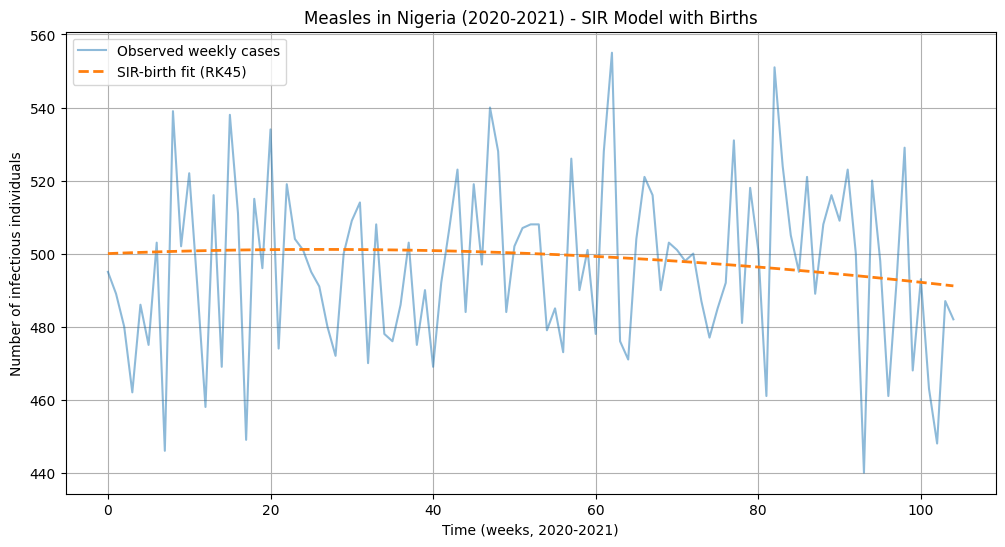

SSE SIR-birth: 55772.44
SSE standard SIR: 67169.53


In [12]:
N = population_size              
life_expectancy_years = 55
mu = 1 / (life_expectancy_years * 52)  

# Initial conditions 
I0 = 500        
R0 = 0
S0 = N - I0 - R0
y0 = [S0, I0, R0]

# Initial guesses for parameters (per week)
beta_guess = 3.0   
gamma_guess = 1.0  

# Time span: 2 years, weekly
t_max_weeks = 104
t_eval = np.linspace(0, t_max_weeks, t_max_weeks + 1)

# Placeholder for observed weekly measles cases 
I_obs = np.random.poisson(500, len(t_eval))  # synthetic placeholder data

# SIR with births ODE
def sir_birth_ode(t, y, beta, gamma, mu, N):
    S, I, R = y
    dSdt = mu * N - beta * S * I / N - mu * S
    dIdt = beta * S * I / N - gamma * I - mu * I
    dRdt = gamma * I - mu * R
    return [dSdt, dIdt, dRdt]

# Simulation function
def simulate_sir_birth(beta, gamma, mu, y0, N, t_eval):
    sol = solve_ivp(
        sir_birth_ode,
        t_span=(t_eval[0], t_eval[-1]),
        y0=y0,
        t_eval=t_eval,
        args=(beta, gamma, mu, N),
        method='RK45',
        rtol=1e-6,
        atol=1e-9
    )
    if not sol.success:
        raise RuntimeError(sol.message)
    return sol.y  # S, I, R

# SSE function for fitting
def sse_sir_birth(params):
    beta, gamma = params
    if beta <= 0 or gamma <= 0:
        return np.inf
    _, I_sim, _ = simulate_sir_birth(beta, gamma, mu, y0, N, t_eval)
    return np.sum((I_obs - I_sim)**2)

# Optimize parameters
initial_guess = [beta_guess, gamma_guess]
bounds = [(0.01, 5.0), (0.01, 2.0)]
res = minimize(sse_sir_birth, initial_guess, bounds=bounds, method='L-BFGS-B')
beta_opt, gamma_opt = res.x
print(f"Optimized parameters for Nigeria measles:")
print(f"  beta = {beta_opt:.4f} per week")
print(f"  gamma = {gamma_opt:.4f} per week")

# Simulate with optimized parameters
S_fit, I_fit, R_fit = simulate_sir_birth(beta_opt, gamma_opt, mu, y0, N, t_eval)

# Plot observed vs fitted
plt.figure(figsize=(12,6))
plt.plot(t_eval, I_obs, "-", alpha=0.5, label="Observed weekly cases")
plt.plot(t_eval, I_fit, "--", linewidth=2, label="SIR-birth fit (RK45)")
plt.xlabel("Time (weeks, 2020-2021)")
plt.ylabel("Number of infectious individuals")
plt.title("Measles in Nigeria (2020-2021) - SIR Model with Births")
plt.legend()
plt.grid(True)
plt.show()

#Compare with standard SIR (no births)
def sir_ode_standard(t, y, beta, gamma, N):
    S, I, R = y
    dSdt = - beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

def simulate_sir_standard(beta, gamma, y0, N, t_eval):
    sol = solve_ivp(
        sir_ode_standard,
        t_span=(t_eval[0], t_eval[-1]),
        y0=y0,
        t_eval=t_eval,
        args=(beta, gamma, N),
        method='RK45'
    )
    return sol.y

S_sir, I_sir, R_sir = simulate_sir_standard(beta_opt, gamma_opt, y0, N, t_eval)

# Compute SSE
sse_sir_birth = np.sum((I_obs - I_fit)**2)
sse_sir = np.sum((I_obs - I_sir)**2)
print(f"SSE SIR-birth: {sse_sir_birth:.2f}")
print(f"SSE standard SIR: {sse_sir:.2f}")

## Verify and validate your analysis: 

To verify the validity of the SIR model, we compared the model-generated infected population to the observed measles case data from Nigeria between 2020 and 2021. Model parameters were estimated by minimizing the sum of squared errors (SSE) between the predicted number of infected individuals and the reported cases. A visual comparison between the model predictions and the actual data was also used to assess goodness of fit.

The model was able to capture the overall trend in measles case dynamics, including periods of increase and decline in reported infections. While exact agreement was not expected due to reporting noise and simplifying assumptions, the predicted curve followed the general shape and timing of the outbreak. This indicates that the parameter values obtained are reasonable and that the SIR framework provides a plausible representation of measles transmission dynamics in Nigeria over the selected time period.


## Conclusions and Ethical Implications: 
The overall conclusion from this project is that the SIR model is able to capture the broad behavior of measle outbreaks in Nigeria given the data. While this specific model does not accound for many real-world complexities, it is useful in demonstrating how changes in transmission or recovery rates affect the case numbers. 

The ethical implications include the assumptions made when using a SIR model. Because it is so genrealized, many confounding variables are not considered with doing data anlaysis therefore applying it explicitly can become a challenge. This model is a good first step towards many public health intiatives however should not be the sole determinant of any health plan as it would not provide the most accurate results. 

## Limitations and Future Work: 

Primary limitation lie in the large assumptions made in using the SIR model. Nigeria has diverse vaccination rates as well as varying public health interventions that significantly alter the populaiton statistics and that were not incorporated into the model. Furthermore, the SIR model assumes constant transmission and recovery rates over time, which may not reflect the changing public health conditions. There are also a large number of unreported cases which can yield inaccurate results. 

Future work could include the use of SEIR model (from the readings) which would take into account a latent period and therefore adding more real-world parameters and increasing accuracy/ applicability. Because this data was taken from 2020-2021, future analysis can be done on more recent data to observe any changes in the model as well. 

## NOTES FROM YOUR TEAM: 
No notes at this time 

## QUESTIONS FOR YOUR TA: 
no questions at this time